## Hipótesis relativa a una varianza o desvío estandar
#### Ditribución χ2 
###### https://www.chreinvent.com/recursos/hip%C3%B3tesis-sobre-media

In [1]:
import math
from statistics import mean, stdev, median, mode
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2
from fitter import Fitter

## Control de calidad  de latas de bebidas
+ La Newport Bottling Company ha fabricado latas de bebidas de cola con cantidades que tienen una desviación estándar de 0.051 onzas. 
+ Se prueba una nueva máquina embotelladora, y una muestra aleatoria simple de 24 latas produce las cantidades (en onzas) que se listan a continuación. 
    + (Las 24 cantidades tienen una desviación estándar de s =  0.039 oz). 
+ Utilizando un nivel de significancia de 0.05: probar la aseveración de que:
    + **las latas de bebidas de cola de la nueva máquina tienen cantidades con una desviación estándar menor que 0.051 oz.**

## Análisis de la muestra

In [2]:
mmsample = [11.98, 11.98, 11.99, 11.98, 11.90, 12.02, 11.99, 11.93, 12.02, 12.02, 12.02, 11.98, 
            12.01, 12.00, 11.99, 11.95, 11.95, 11.96, 11.96, 12.02, 11.99, 12.07, 11.93, 12.05]

### Requisitos de la muestra
1. La muestra es aleatoria simple.
2. Sí, se **conoce** el valor de la desviación estándar poblacional 𝞂.
3. La población se distribuye normalente. Es lo primero a verificar.

Antes de iniciar cualquier procedimiento de prueba de hipótesis, 
+ debemos explorar primero el conjunto de datos y 
+ verificar que los requisitos de la prueba específica se cumplan.

Para esto es preciso observar a) Estadísticos de la muestra y b) Normalidad

## Estadísticos de la muestra

In [3]:
me, sd = mean(mmsample), stdev(mmsample)
mi, ma = min(mmsample), max(mmsample)
ta = len(mmsample)
print("Estadísticos de la muestra:")
print(f"+ media:{me:.3f}\n" 
          f"+ desvío estandard:{sd:.3f}\n" 
          f"+ minimo:{mi}, máximo: {ma}")
print(f"+ tamaño de la muestra: {ta}")

Estadísticos de la muestra:
+ media:11.987
+ desvío estandard:0.039
+ minimo:11.9, máximo: 12.07
+ tamaño de la muestra: 24


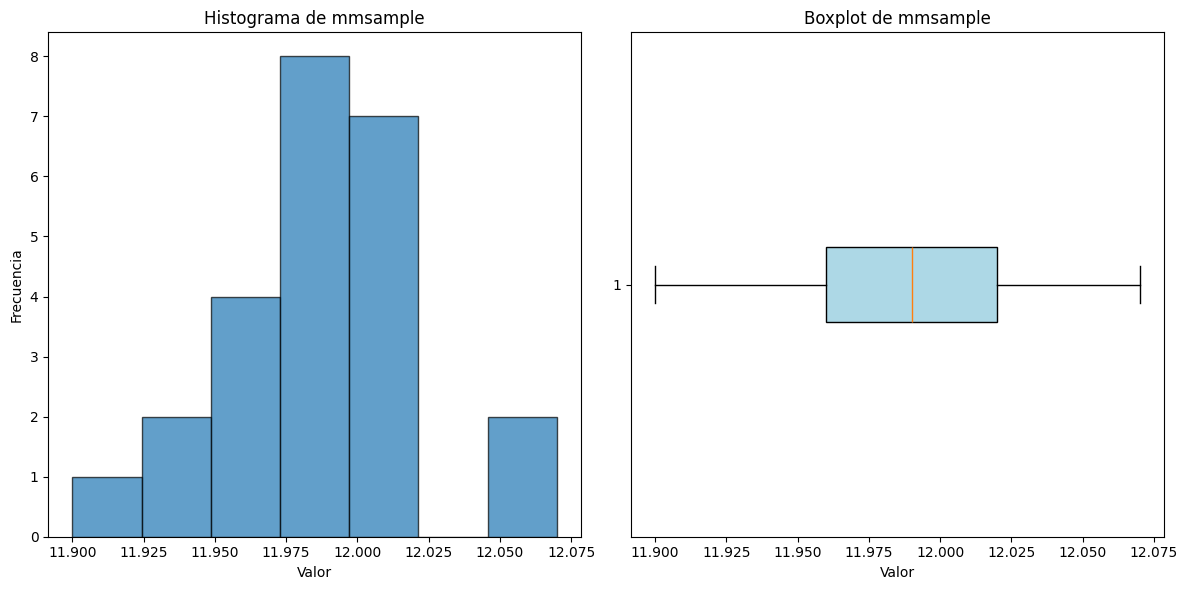


Estadísticos en orden para ver en grafica: Observaciones: 24, Rango: 0.170.
min: 11.9,   -1sd: -0.039,   mode: 12.02,   median: 11.99,   media: 11.987,   +1sd: 0.039,   max: 12.07
First quartile (Q1): 11.96
Third quartile (Q3): 12.02
Interquartile range (IQR): 0.060
Lower limit: 11.870
Upper limit: 12.110


In [4]:
# Configuración de los gráficos
plt.figure(figsize=(12, 6))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(mmsample, bins=7, edgecolor='black', alpha=0.7)
plt.title('Histograma de mmsample')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(mmsample, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot de mmsample')
plt.xlabel('Valor')

# Mostrar gráficos
plt.tight_layout()
plt.show()

print(f"\nEstadísticos en orden para ver en grafica: Observaciones: {len(mmsample)}, Rango: {(ma - mi):.3f}.")
# Medidas de tendencia central
print(f"min: {mi},   -1sd: {-sd:.3f},   mode: {mode(mmsample)},   median: {median(mmsample)},"\
      f"   media: {me:.3f},   +1sd: {sd:.3f},   max: {ma}")
import numpy as np

def calculate_iqr_and_boxplot_limits(data):
  """
  This function calculates the interquartile range (IQR), quartiles, 
  and upper and lower limits for a boxplot.

  Args:
      data: A list or NumPy array of numerical data.

  Returns:
      A dictionary containing the following keys:
          - 'Q1': The first quartile (25th percentile).
          - 'Q3': The third quartile (75th percentile).
          - 'IQR': The interquartile range (IQR).
          - 'lower_limit': The lower limit for the boxplot.
          - 'upper_limit': The upper limit for the boxplot.
  """

  # Sort the data in ascending order
  data = np.sort(data)

  # Calculate the number of data points
  n = len(data)

  # Check for empty data
  if n == 0:
    return {
      'Q1': None,
      'Q3': None,
      'IQR': None,
      'lower_limit': None,
      'upper_limit': None,
    }

  # Find the quartiles based on even or odd number of data points
  if n % 2 == 0:
    Q1_index = int(n / 4) - 1
    Q3_index = int(n / 4 * 3) - 1
  else:
    Q1_index = int((n + 1) / 4) - 1
    Q3_index = int((n + 1) / 4 * 3) - 1

  # Calculate the quartiles
  Q1 = data[Q1_index]
  Q3 = data[Q3_index]

  # Calculate the interquartile range
  IQR = Q3 - Q1

  # Calculate the upper and lower limits
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR

  return {
    'Q1': Q1,
    'Q3': Q3,
    'IQR': IQR,
    'lower_limit': lower_limit,
    'upper_limit': upper_limit,
  }

# Example usage
data = mmsample
results = calculate_iqr_and_boxplot_limits(data)

print(f"First quartile (Q1): {results['Q1']}")
print(f"Third quartile (Q3): {results['Q3']}")
print(f"Interquartile range (IQR): {results['IQR']:.3f}")
print(f"Lower limit: {results['lower_limit']:.3f}")
print(f"Upper limit: {results['upper_limit']:.3f}")


### Análisis de normalidad de los datos de la muestra
###### https://www.chreinvent.com/recursos/an%C3%A1lisis-de-normalidad

Shapiro-Wilk Test
Evalúa la hipótesis nula de que una muestra proviene de una distribución normal. Es una prueba muy sensible para muestras pequeñas.
Shapiro-Wilk Test: ShapiroResult(statistic=0.976239893354295, pvalue=0.817815692856716)
Si el valor p es menor que 0.05, se rechaza la hipótesis nula, sugiriendo que los datos no son normales.

Anderson-Darling Test
Evalúa la hipótesis nula de que los datos siguen una distribución específica (por defecto, normal).
Anderson-Darling Test: AndersonResult(statistic=0.32037579961676954, critical_values=array([0.513, 0.584, 0.701, 0.817, 0.972]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=11.987083333333336, scale=0.03928482024203846)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
El resultado incluye un estadístico de prueba y una serie de valores críticos.
Si el estadístico es mayor que los valores críticos correspondientes a ciertos niveles de significan

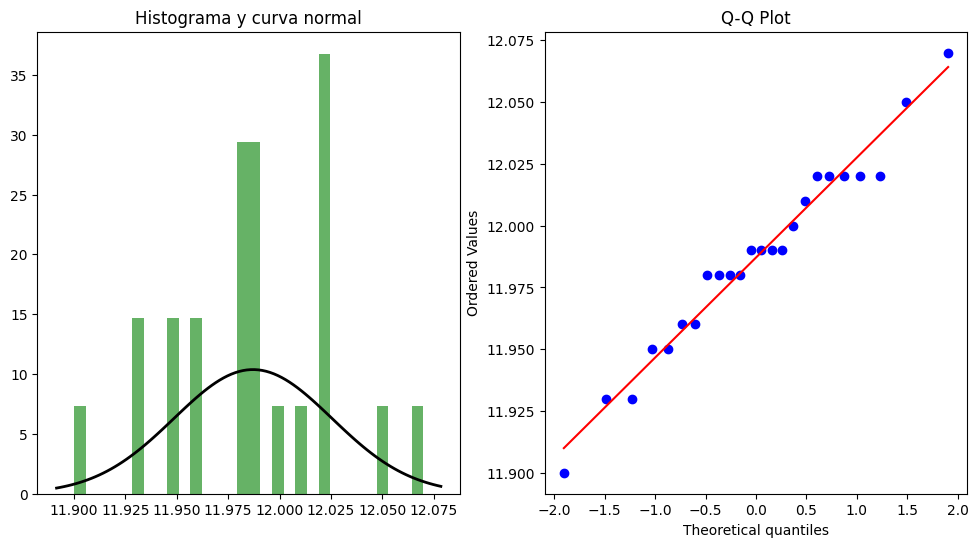

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,40045.051437,-300.738481,-298.382373,inf,0.135267,0.722474
lognorm,40045.051983,-298.738478,-295.204316,inf,0.135268,0.722473
gamma,40059.827879,-298.714566,-295.180404,inf,0.141143,0.673913
expon,42280.130819,-288.962642,-286.606534,inf,0.311824,0.014291


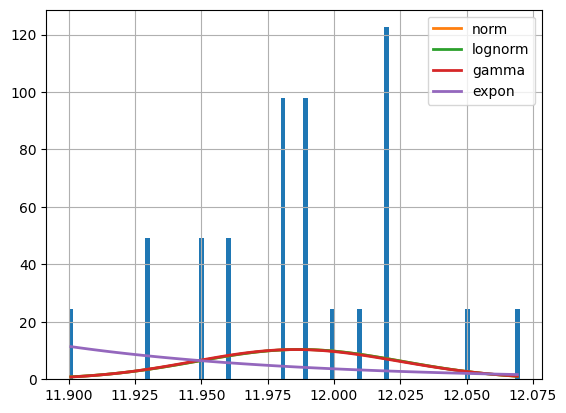

In [5]:
# Pruebas de normalidad
shapiro_test = stats.shapiro(data)
anderson_test = stats.anderson(data, dist='norm')
dagostino_test = stats.normaltest(data)

print("Shapiro-Wilk Test")
print("Evalúa la hipótesis nula de que una muestra proviene de una distribución normal. Es una prueba muy sensible para muestras pequeñas.")
print("Shapiro-Wilk Test:", shapiro_test)
print("Si el valor p es menor que 0.05, se rechaza la hipótesis nula, sugiriendo que los datos no son normales.\n")

print("Anderson-Darling Test")
print("Evalúa la hipótesis nula de que los datos siguen una distribución específica (por defecto, normal).")
print("Anderson-Darling Test:", anderson_test)
print("El resultado incluye un estadístico de prueba y una serie de valores críticos.\n"
      f"Si el estadístico es mayor que los valores críticos correspondientes a ciertos niveles de significancia, se rechaza la hipótesis nula.\n")

print("D'Agostino's K-squared Test")
print("Compara una muestra con una distribución de referencia (normal en este caso).")
print("D'Agostino's K-squared Test:", dagostino_test)
print("Si el valor p es menor que 0.05, se rechaza la hipótesis nula, sugiriendo que los datos no son normales.\n")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, loc=np.mean(data), scale=np.std(data))
plt.plot(x, p, 'k', linewidth=2)
plt.title("Histograma y curva normal")

plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot")

plt.show()

# Ajuste de distribución con Fitter
f = Fitter(data, distributions=['norm', 'lognorm', 'expon', 'gamma'])
f.fit()
f.summary()

**Observaciones**
Luego de realizados 5 test de normalidad se concluye que es aceptable modelar esta muestra con una distribución normal
###### https://www.chreinvent.com/recursos/an%C3%A1lisis-de-normalidad
###### https://github.com/DaniCh-Coder/Python-Notes/blob/main/ps%20stats/Probability-distributions/dp-norm-testing.ipynb

## Distribución Chi2 de la Muestra
Debe notarse que se analiza una hipótesis de un desvío estandard de sobre una población.
+ El desvío estandar de la población en este caso es: **0.051**
    + El tamaño de la muestra es: **24**.
    + El desvío estandar de la muestra es: **0.039**
+ Se sabe también (por definición) que los grados de libertad (df) son : 24-1.

## Hipótesis del gerente de producción
+ Probar la aseveración de que las latas de bebidas de cola de la nueva máquina tienen cantidades con una desviación estándar menor que antes.
    + Es decir que el desvío estandar de la maquina nueva (0.039) es signigicativamente menor que el devío de las máquinas viejas (0.051)
## Prueba de hipótesis
+ Para probar la hipótesis que el devío nuevo es menor que el devío viejo.
    + comparamos el desvío de viejo (población) con el desvío nuevo (muestra)
    + vemos dónde se ubica el devío de la muestra en comparación con la región crítica
    + esto se logra construyendo el estadístico de la muestra y la región crítica alfa.
## H0 y H1
+ Definimos
    + Hipótesis Nula H0: 𝞂 = 0.051
    + Hipótesis Alternativa H1: 𝞂 < 0.051

## Análisis del estadístico de prueba χ2 y la región crítica
+ Si el estadístico de la muestra entra dentro de la región crítica la H0 se rechaza
+ Si el estadístico de la muestra está fuera de la región crítica la H0 no se puede rechazar

Estadístico de prueba: 13.4498
Valor p: 0.0584
No podemos rechazar la hipótesis nula: no hay suficiente evidencia para afirmar que la nueva máquina tiene una desviación estándar menor que 0.051 oz.


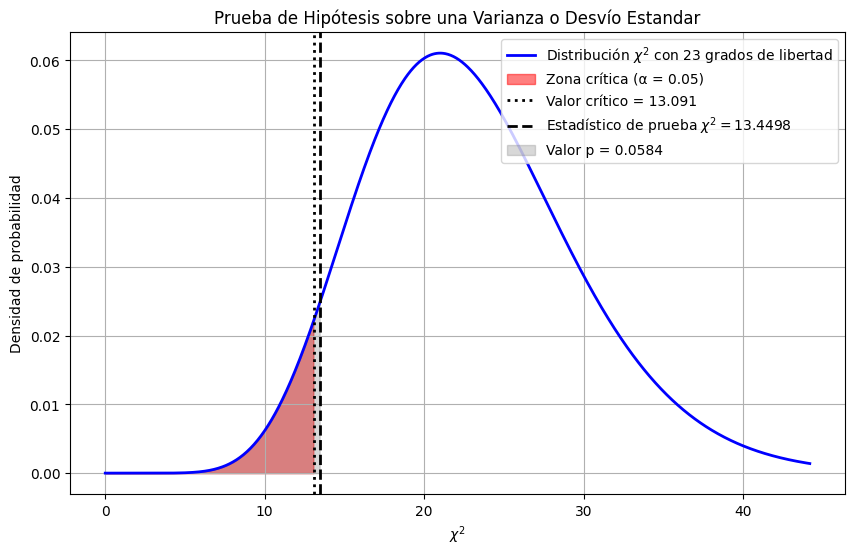

In [6]:
# Datos de la muestra
mmsample = [11.98, 11.98, 11.99, 11.98, 11.90, 12.02, 11.99, 11.93, 12.02, 12.02, 12.02, 11.98, 
            12.01, 12.00, 11.99, 11.95, 11.95, 11.96, 11.96, 12.02, 11.99, 12.07, 11.93, 12.05]

# Tamaño de la muestra
n = len(mmsample)

# Desviación estándar muestral
s = 0.039

# Desviación estándar bajo H0
sigma_0 = 0.051

# Varianza bajo H0
sigma_0_squared = sigma_0 ** 2

# Varianza muestral
sample_variance = s ** 2

# Estadístico chi-cuadrado
chi2_statistic = (n - 1) * sample_variance / sigma_0_squared

# Grados de libertad
df = n - 1

# Valor crítico para una prueba unilateral
alpha = 0.05
critical_value = chi2.ppf(alpha, df)

# Valor p para la prueba unilateral (cola inferior)
p_value = chi2.cdf(chi2_statistic, df)

# Resultado
print(f"Estadístico de prueba: {chi2_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

# Decisión
if p_value < alpha:
    print("Rechazamos la hipótesis nula: la nueva máquina tiene una desviación estándar menor que 0.051 oz.")
else:
    print("No podemos rechazar la hipótesis nula: no hay suficiente evidencia para afirmar que la nueva máquina tiene una desviación estándar menor que 0.051 oz.")

# Gráfico
x = np.linspace(0, chi2.ppf(0.995, df), 1000)
y = chi2.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', lw=2, label=r'Distribución $\chi^2$ con 23 grados de libertad')
plt.fill_between(x, 0, y, where=(x <= chi2.ppf(alpha, df)), color='red', alpha=0.5, label='Zona crítica (α = 0.05)')
plt.axvline(critical_value, color='black', linestyle='dotted', linewidth=2, label=f'Valor crítico = {critical_value:.3f}')
plt.axvline(chi2_statistic, color='black', linestyle='--', lw=2, label=rf'Estadístico de prueba $\chi^2 = {chi2_statistic:.4f}$')
plt.fill_between(x, 0, y, where=(x <= chi2_statistic), color='grey', alpha=0.3, label=rf'Valor p = {p_value:.4f}')
plt.title('Prueba de Hipótesis sobre una Varianza o Desvío Estandar')
plt.xlabel(r'$\chi^2$')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()


**Observaciones**
+ El estadístico de prueba está fuera de la zona crítica del nivel de signifiancia alfa marcada en rosa
+ El estadístico de prueba es mayor que el valor crítico

### **Conclusiones del análisis del estadístico de prueba (Chi2)**
+ Puede que s = 0.039 haya aparecido como consecuencia del azar o no.
+ De cualquier forma no es suficiente para considerarlo significativamente menor que el valor antigua de desvío estandar.

### **Análisis del valor P**
+ Con el estadístico de prueba se puede analizar el valor P en contraste con α

**Observaciones**
+ El valor P asociado al estadístico de prueba χ2  es mayor que α
    + Es la región sobreada de la figura: 5.84% > 5%
### **Conclusiones del valor P del estadístico de Prueba**
+ El valor P suficientemente alto para hacer aceptable la Hipótesis Nula H0
+ No se puede rechazar la H0: 𝞂 = 0.051

## **Conclusiones finales**
+ No podemos rechazar la hipótesis nula: H0: 𝞂 = 0.051
    + no hay suficiente evidencia para afirmar que la nueva máquina tiene una desviación estándar menor que 0.051 oz.

___________________________________________________________________________________________________________________________________________________________________